In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
from dateutil import parser
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as skl

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
# Store filepath in a variable
file_one = Path("Resources/Property Sales Data/2013_to_2023_property-sales-data.csv")

In [3]:
# Read our data file with the Pandas library
# Not every CSV requires an encoding, but be aware this can come up
original_df = pd.read_csv(file_one, encoding="ISO-8859-1")

C:\Users\Kunwar\AppData\Local\Temp\ipykernel_13744\2974018042.py:3: DtypeWarning: Columns (12,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  original_df = pd.read_csv(file_one, encoding="ISO-8859-1")


In [4]:
# Show the first five rows.
original_df.head()

,ï»¿PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,98459.0,Commercial,30091000,9220 N 107TH ST,NaN,9.0,6202.0,Office Building - 1 Story,Concrete Block,1.0,1981.0,NaN,12960,5,NaN,0.0,0.0,54885,2023-08-15,530000
1,98477.0,Residential,39995000,9574 N 107TH ST,NaN,9.0,40.0,Cape Cod,Aluminum/Vinyl,1.0,1942.0,7.0,1182,1,4.0,1.0,1.0,33541,2023-12-15,160000
2,98500.0,Residential,40071000,9531 N MICHAEL CT,NaN,9.0,40.0,Ranch,Fiber Cement/Hardiplank,1.0,2006.0,9.0,1880,1,3.0,2.0,0.0,10607,2023-08-31,387500
3,98566.0,Residential,50047000,9350 N JOYCE AV,NaN,9.0,40.0,Ranch,Aluminum/Vinyl,1.0,1980.0,6.0,1489,1,3.0,3.0,0.0,8640,2023-08-25,335000
4,98598.0,Residential,50079000,9355 N BURBANK AV,NaN,9.0,40.0,Ranch,Aluminum/Vinyl,1.0,1986.0,5.0,1209,1,3.0,1.0,1.0,7200,2023-06-20,250000


In [5]:
#getting only 'Residential' values
residential_df = original_df.loc[original_df["PropType"] == 'Residential']
residential_df.head()

,ï»¿PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
1,98477.0,Residential,39995000,9574 N 107TH ST,NaN,9.0,40.0,Cape Cod,Aluminum/Vinyl,1.0,1942.0,7.0,1182,1,4.0,1.0,1.0,33541,2023-12-15,160000
2,98500.0,Residential,40071000,9531 N MICHAEL CT,NaN,9.0,40.0,Ranch,Fiber Cement/Hardiplank,1.0,2006.0,9.0,1880,1,3.0,2.0,0.0,10607,2023-08-31,387500
3,98566.0,Residential,50047000,9350 N JOYCE AV,NaN,9.0,40.0,Ranch,Aluminum/Vinyl,1.0,1980.0,6.0,1489,1,3.0,3.0,0.0,8640,2023-08-25,335000
4,98598.0,Residential,50079000,9355 N BURBANK AV,NaN,9.0,40.0,Ranch,Aluminum/Vinyl,1.0,1986.0,5.0,1209,1,3.0,1.0,1.0,7200,2023-06-20,250000
5,98624.0,Residential,50105000,8210 W GLENBROOK RD,NaN,9.0,40.0,Colonial,Aluminum/Vinyl,2.0,1989.0,6.0,1663,1,3.0,2.0,1.0,7200,2023-01-10,270000


In [6]:
#delete unwanted columns
residential_df.drop(['CondoProject', 'ï»¿PropertyID','PropType','District','Extwall','nbhd','Stories','taxkey','Address','Rooms','Year_Built','Units','Style','Hbath'], axis=1, inplace=True)

C:\Users\Kunwar\AppData\Local\Temp\ipykernel_13744\2266667612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_df.drop(['CondoProject', 'ï»¿PropertyID','PropType','District','Extwall','nbhd','Stories','taxkey','Address','Rooms','Year_Built','Units','Style','Hbath'], axis=1, inplace=True)


In [7]:
residential_df.head()

,FinishedSqft,Bdrms,Fbath,Lotsize,Sale_date,Sale_price
1,1182,4.0,1.0,33541,2023-12-15,160000
2,1880,3.0,2.0,10607,2023-08-31,387500
3,1489,3.0,3.0,8640,2023-08-25,335000
4,1209,3.0,1.0,7200,2023-06-20,250000
5,1663,3.0,2.0,7200,2023-01-10,270000


In [8]:
residential_df.shape

(43742, 6)

In [9]:
#check datatype of each column
residential_df.dtypes

FinishedSqft     object
Bdrms           float64
Fbath           float64
Lotsize          object
Sale_date        object
Sale_price       object
dtype: object

In [10]:
# 'Sale_date' column:change the datatype format
def custom_date_parser(date_string):
    try:
        # Attempt to parse the date using dateutil.parser
        parsed_date = parser.parse(date_string, default=datetime(1, 1, 1))
        if parsed_date.year == 1:
            raise ValueError("Incomplete date, handled separately")
        return parsed_date
    except (parser.ParserError, ValueError):
        # Handle specific incomplete date cases manually
        if '-' in date_string:
            try:
                # Attempt to parse dates like "Jul-18" as month and year
                date = datetime.strptime(date_string, "%b-%y")
                return date.replace(day=1)  # Set the day to the first day of the month
            except ValueError:
                try:
                    # Attempt to parse dates like "07-18" as month and year
                    date = datetime.strptime(date_string, "%m-%y")
                    return date.replace(day=1)  # Set the day to the first day of the month
                except ValueError:
                    pass
        # Return pd.NaT if the date cannot be parsed
        return pd.NaT

# Sample data with mixed date formats
date_strings = residential_df['Sale_date']

# Apply the custom date parser to each date string
parsed_dates = [custom_date_parser(date) for date in date_strings]

# Convert to pandas Series for better handling and display
parsed_dates_series = pd.Series(parsed_dates)
print(parsed_dates_series)


0       2023-12-15
1       2023-08-31
2       2023-08-25
3       2023-06-20
4       2023-01-10
           ...    
43737   2013-12-01
43738   2013-12-01
43739   2013-12-01
43740   2013-12-01
43741   2013-12-01
Length: 43742, dtype: datetime64[ns]


In [11]:
residential_df['Sale_date']=parsed_dates_series
residential_df = residential_df.dropna(subset=['Sale_date'])
residential_df['Sale_date'] = residential_df['Sale_date'].apply(lambda x: x.timestamp())
residential_df.head()

C:\Users\Kunwar\AppData\Local\Temp\ipykernel_13744\509770864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_df['Sale_date']=parsed_dates_series


,FinishedSqft,Bdrms,Fbath,Lotsize,Sale_date,Sale_price
1,1182,4.0,1.0,33541,1.693440e+09,160000
2,1880,3.0,2.0,10607,1.692922e+09,387500
3,1489,3.0,3.0,8640,1.687219e+09,335000
4,1209,3.0,1.0,7200,1.673309e+09,250000
5,1663,3.0,2.0,7200,1.703635e+09,270000


In [12]:
# replace '$' sign from some Sale_price values
residential_df=residential_df.dropna(subset=['Sale_price'])


residential_df['Sale_price'] = residential_df['Sale_price'].astype(str)

residential_df['Sale_price'] = residential_df['Sale_price'].str.replace('$', '')
residential_df['Sale_price'] = residential_df['Sale_price'].str.replace(',', '')
residential_df['Sale_price'] = pd.to_numeric(residential_df['Sale_price']).astype(int)
residential_df.head()

,FinishedSqft,Bdrms,Fbath,Lotsize,Sale_date,Sale_price
1,1182,4.0,1.0,33541,1.693440e+09,160000
2,1880,3.0,2.0,10607,1.692922e+09,387500
3,1489,3.0,3.0,8640,1.687219e+09,335000
4,1209,3.0,1.0,7200,1.673309e+09,250000
5,1663,3.0,2.0,7200,1.703635e+09,270000


In [13]:
residential_df=residential_df.dropna(subset=['Bdrms','Fbath','Lotsize'])

residential_df['Bdrms'] = pd.to_numeric(residential_df['Bdrms']).astype(int)
residential_df['Fbath'] = pd.to_numeric(residential_df['Fbath']).astype(int)

residential_df['Lotsize'] = residential_df['Lotsize'].astype(str)
residential_df['Lotsize'] = residential_df['Lotsize'].str.replace(',', '')
residential_df['Lotsize'] = pd.to_numeric(residential_df['Lotsize']).astype(int)

In [14]:
residential_df.shape

(34473, 6)

In [15]:
residential_df.dtypes

FinishedSqft     object
Bdrms             int32
Fbath             int32
Lotsize           int32
Sale_date       float64
Sale_price        int32
dtype: object

In [16]:
#try to find outliers

residential_df.describe()[['Sale_price']]

,Sale_price
count,3.447300e+04
mean,1.712899e+05
std,1.011189e+05
min,0.000000e+00
25%,1.120000e+05
50%,1.580000e+05
75%,2.150000e+05
max,2.500000e+06


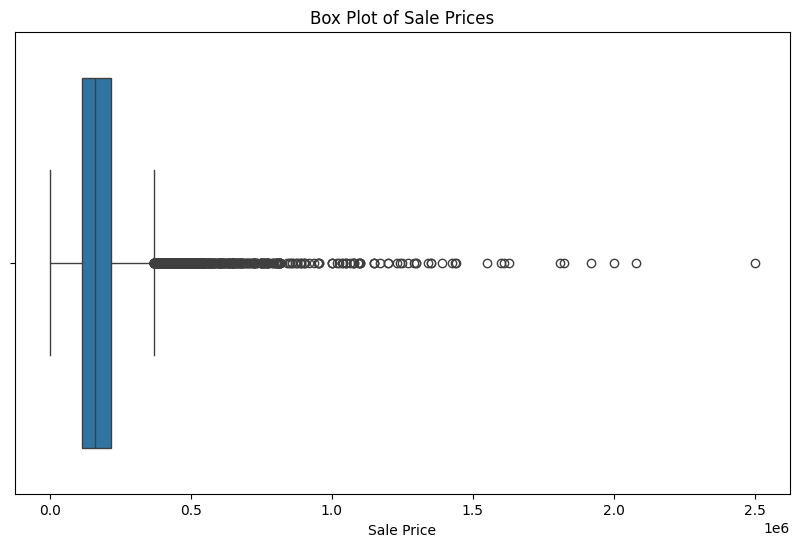

In [17]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=residential_df['Sale_price'])
plt.title('Box Plot of Sale Prices')
plt.xlabel('Sale Price')
plt.show()

In [18]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = residential_df['Sale_price'].quantile(0.25)
Q3 = residential_df['Sale_price'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = residential_df[(residential_df['Sale_price'] >= lower_bound) & (residential_df['Sale_price'] <= upper_bound)]


# Display the DataFrame without outliers
df_no_outliers.shape

(33440, 6)

In [19]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(df_no_outliers)
dummies.head()

,Bdrms,Fbath,Lotsize,Sale_date,Sale_price,FinishedSqft_0,FinishedSqft_256,FinishedSqft_484,FinishedSqft_487,FinishedSqft_500,...,FinishedSqft_990,FinishedSqft_991,FinishedSqft_992,FinishedSqft_993,FinishedSqft_994,FinishedSqft_995,FinishedSqft_996,FinishedSqft_997,FinishedSqft_998,FinishedSqft_999
1,4,1,33541,1.693440e+09,160000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,3,8640,1.687219e+09,335000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,1,7200,1.673309e+09,250000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,3,2,7200,1.703635e+09,270000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25,3,2,7412,1.674605e+09,250000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
# Split our preprocessed data into our features and target arrays
y = dummies['Sale_price'].values.reshape(-1, 1)
y[:5]
X = dummies.drop(columns='Sale_price').values


# Transforming y_moons to a vertical vector
#y = y.reshape(-1, 1)


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 78)

In [21]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [22]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [23]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [25]:
# Fit the model and use .ravel()on the "y_train" data. 
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

MemoryError: could not allocate 594542592 bytes

In [ ]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [ ]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(X_train[0])
layer1 = 120
layer2 = 80
layer3 = 60
layer4 = 40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=layer1,input_dim = input_features_total, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation="tanh"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation="tanh"))
# fourth hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation="tanh"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

c:\Users\Kunwar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 120)            │       501,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 80)             │         9,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 80)             │         6,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 80)             │         6,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 523,721 (2.00 MB)

 Trainable params: 523,721 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0000e+00 - loss: -3593460.0000
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.0000e+00 - loss: -11389860.0000
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0000e+00 - loss: -18785646.0000
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0000e+00 - loss: -26016458.0000
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0000e+00 - loss: -33342216.0000
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0000e+00 - loss: -40726952.0000
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0000e+00 - loss: -48292816.0000
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0000e+00 - loss: -55019816.0000
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.0000e+00 - loss: -62150720.0000
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.0000e+00 - loss: -69748392.0000
Epoch 1

In [ ]:
n_components = 1  # Adjust this parameter as needed
pca = PCA(n_components=n_components)

# Fit PCA on training data and transform both training and test data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Standardize the transformed data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [ ]:
 #Define the function to create the model with hyperparameter options
import keras_tuner as kt
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow keras tuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation', ['relu', 'tanh', 'sigmoid'])
    
    # Allow keras tuner to decide the number of neurons in the first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
                                                     min_value=1,
                                                     max_value=10,
                                                     step=2),
                                       activation=activation,
                                       input_dim=X_train_scaled.shape[1]))

    # Allow keras tuner to decide the number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 10)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
                                                         min_value=1,
                                                         max_value=10,
                                                         step=2),
                                           activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

# Define PCA with desired number of components
n_components = 1  
pca = PCA(n_components=n_components)

# Fit PCA on training data and transform both training and test data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Standardize the transformed data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

# Initialize Hyperband tuner
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

# Run the tuner search for best hyperparameters
tuner.search(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))

Trial 60 Complete [00h 00m 22s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 00h 14m 45s


In [ ]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'sigmoid',
 'first_units': 1,
 'num_layers': 3,
 'units_0': 3,
 'tuner/epochs': 3,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0,
 'units_1': 1,
 'units_2': 1}

In [ ]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

172/172 - 0s - 3ms/step - accuracy: 0.0000e+00 - loss: -2.6602e+05
Loss: -266016.96875, Accuracy: 0.0


In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(X_train[0])
layer1 = 128
layer2 = 64


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=layer1,input_dim = input_features_total, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation="relu"))



# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

c:\Users\Kunwar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │       567,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 575,745 (2.20 MB)

 Trainable params: 575,745 (2.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
531/531 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.0000e+00 - loss: -873372544.0000
Epoch 2/100
531/531 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.0000e+00 - loss: -40417361920.0000
Epoch 3/100
531/531 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.0000e+00 - loss: -232307392512.0000
Epoch 4/100
531/531 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.0000e+00 - loss: -657134518272.0000
Epoch 5/100
531/531 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.0000e+00 - loss: -1372306931712.0000
Epoch 6/100
531/531 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.0000e+00 - loss: -2436998627328.0000
Epoch 7/100
531/531 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.0000e+00 - loss: -3875320889344.0000
Epoch 8/100
531/531 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0000e+00 - loss: -5693937549312.0000
Epoch 9/100
531/531 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.0000e+00 - loss: -7827200933888.0000
Epoch 10/100
531/531 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accurac

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

177/177 - 0s - 2ms/step - accuracy: 0.0000e+00 - loss: -1.5166e+14
Loss: -151664220700672.0, Accuracy: 0.0
